In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display, HTML, Image



In [108]:
data=pd.read_csv('../data/amazonca_products.csv')

In [109]:
data.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
0,B07CV4L6HX,"Green Leaf WW3D Wonder Extension Cord Winder, ...",https://m.media-amazon.com/images/I/81cRe0AVC4...,https://www.amazon.ca/dp/B07CV4L6HX,4.4,2876,47.69,0.00,Industrial Scientific,False,0
1,B09N1HGY74,8pcs Toilet Seat Bumpers Universal Toilet Repl...,https://m.media-amazon.com/images/I/512CpB-EP5...,https://www.amazon.ca/dp/B09N1HGY74,3.8,55,10.99,0.00,Industrial Scientific,False,100
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,https://m.media-amazon.com/images/I/71P+qLFDFc...,https://www.amazon.ca/dp/B087P7538J,4.0,126,25.99,27.99,Industrial Scientific,False,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,https://m.media-amazon.com/images/I/61wfWLZRn-...,https://www.amazon.ca/dp/B0822FF7YQ,4.5,1936,21.99,30.99,Industrial Scientific,False,100
4,B08NTR8NN4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",https://m.media-amazon.com/images/I/61qJG-y1He...,https://www.amazon.ca/dp/B08NTR8NN4,4.2,46,18.99,0.00,Industrial Scientific,False,100


In [110]:
missing_data=data.isnull().sum()
missing_data

asin                 0
title                6
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
categoryName         0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

In [111]:
data=data.dropna()

In [112]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2165920 entries, 0 to 2165925
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   listPrice          float64
 8   categoryName       object 
 9   isBestSeller       bool   
 10  boughtInLastMonth  int64  
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 183.8+ MB
None


In [113]:
missing_data=data.isnull().sum()
missing_data

asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
categoryName         0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

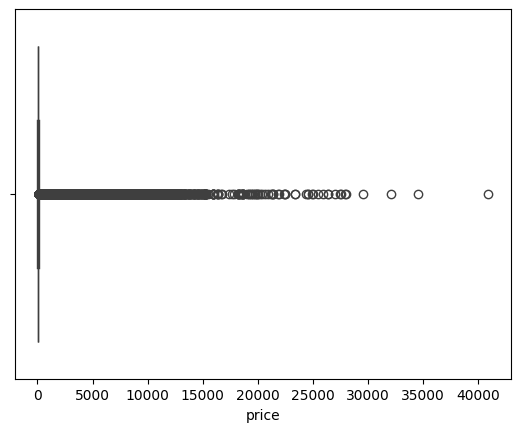

In [114]:
sns.boxplot(x=data['price'])
plt.show()

In [115]:
zero_price_count=(data['price']==0).sum()
negative_price_count=(data['price']<0).sum()
print(f"'price' column has {zero_price_count} 0 values and {negative_price_count} negative values")

'price' column has 177910 0 values and 0 negative values


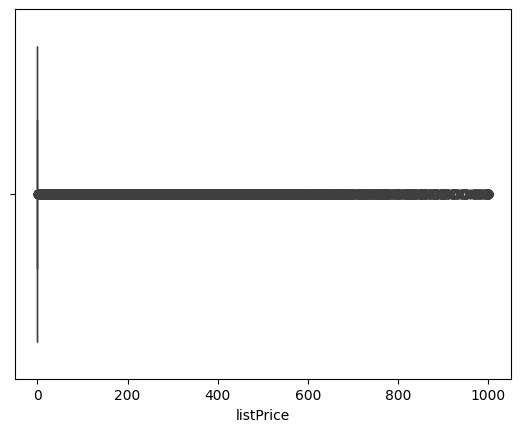

In [116]:
sns.boxplot(x=data['listPrice'])
plt.show()

In [118]:
data=data[data['price']>0]
remaining_zero_count=(data['price']==0).sum()
remaining_negative_count=(data['price']<0).sum()
print(f"'After data cleaning  with zero count = {remaining_zero_count} and price with negative count = {remaining_negative_count}")

'After data cleaning  with zero count = 0 and price with negative count = 0


In [119]:
print(data['categoryName'].value_counts())

categoryName
Baby                            24074
Luggage  Travel Gear            22449
Handmade Home Décor             19143
Handmade Kitchen  Dining        19074
Handmade Jewellery              18545
                                ...  
Kids' Ball Pits  Accessories      587
Blu-ray Players  Recorders        467
Smart Home                        434
STEM                              210
International Food Market         152
Name: count, Length: 266, dtype: int64


In [120]:
data = data[(data['stars'] >= 0) & (data['stars'] <= 5)]
data = data[data['reviews'] >= 0]
data = data[data['boughtInLastMonth'] >= 0]
print(data['categoryName'].value_counts())

categoryName
Baby                            24074
Luggage  Travel Gear            22449
Handmade Home Décor             19143
Handmade Kitchen  Dining        19074
Handmade Jewellery              18545
                                ...  
Kids' Ball Pits  Accessories      587
Blu-ray Players  Recorders        467
Smart Home                        434
STEM                              210
International Food Market         152
Name: count, Length: 266, dtype: int64


In [121]:
data=data[data['listPrice']>0]

In [122]:
data = data.drop_duplicates()

In [123]:
data.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,https://m.media-amazon.com/images/I/71P+qLFDFc...,https://www.amazon.ca/dp/B087P7538J,4.0,126,25.99,27.99,Industrial Scientific,False,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,https://m.media-amazon.com/images/I/61wfWLZRn-...,https://www.amazon.ca/dp/B0822FF7YQ,4.5,1936,21.99,30.99,Industrial Scientific,False,100
9,B07KMT96S2,"Knife Sharpening Stone,400/1000.2000/5000 Doub...",https://m.media-amazon.com/images/I/61uWVjhezJ...,https://www.amazon.ca/dp/B07KMT96S2,4.4,366,29.99,35.99,Industrial Scientific,False,50
13,B08R8T657H,"MIXPOWER Extra Long Torx Bit Socket Set, 3.5-i...",https://m.media-amazon.com/images/I/6154LErNL3...,https://www.amazon.ca/dp/B08R8T657H,4.4,82,19.97,21.97,Industrial Scientific,False,0
18,B088M3JCP2,Heat Insulation Silicone Repair Mat with Scale...,https://m.media-amazon.com/images/I/61nzkHmJSZ...,https://www.amazon.ca/dp/B088M3JCP2,4.7,142,21.99,25.99,Industrial Scientific,False,50


In [124]:
data.describe()

,stars,reviews,price,listPrice,boughtInLastMonth
count,166649.000000,166649.000000,166649.000000,166649.000000,166649.000000
mean,4.059658,1538.714268,50.421619,60.453717,32.154708
std,1.095613,8205.360235,76.992933,90.567272,215.280538
min,0.000000,0.000000,0.010000,1.690000,0.000000
25%,4.000000,15.000000,15.990000,19.680000,0.000000
50%,4.400000,117.000000,25.950000,30.990000,0.000000
75%,4.600000,718.000000,49.950000,59.980000,0.000000
max,5.000000,868865.000000,950.000000,999.990000,20000.000000


In [125]:
data.loc[data['categoryName'] == 'Nursery Furniture, Bedding  Décor', 'categoryName'] = 'Nursery Furniture, Bedding Decor'
data.loc[data['title'] == 'Uniden BCD436HP Handheld Digital Scanner with HPDB and Phase 2','categoryName'] ='Electronics'
data.loc[data['title'] == 'Sony SACS9 10-Inch Active Subwoofer, Black','categoryName'] ='Electronics'



In [126]:
csv_path='../data/clean_amazonca.csv'
df=pd.DataFrame(data)
df.to_csv(csv_path,index=False)
print(f'DataFrame has been successfully saved to {csv_path}')

DataFrame has been successfully saved to ../data/clean_amazonca.csv


In [127]:
cleandata=pd.read_csv('../data/clean_amazonca.csv')

In [128]:
cleandata.describe()

,stars,reviews,price,listPrice,boughtInLastMonth
count,166649.000000,166649.000000,166649.000000,166649.000000,166649.000000
mean,4.059658,1538.714268,50.421619,60.453717,32.154708
std,1.095613,8205.360235,76.992933,90.567272,215.280538
min,0.000000,0.000000,0.010000,1.690000,0.000000
25%,4.000000,15.000000,15.990000,19.680000,0.000000
50%,4.400000,117.000000,25.950000,30.990000,0.000000
75%,4.600000,718.000000,49.950000,59.980000,0.000000
max,5.000000,868865.000000,950.000000,999.990000,20000.000000


In [129]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166649 entries, 0 to 166648
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               166649 non-null  object 
 1   title              166649 non-null  object 
 2   imgUrl             166649 non-null  object 
 3   productURL         166649 non-null  object 
 4   stars              166649 non-null  float64
 5   reviews            166649 non-null  int64  
 6   price              166649 non-null  float64
 7   listPrice          166649 non-null  float64
 8   categoryName       166649 non-null  object 
 9   isBestSeller       166649 non-null  bool   
 10  boughtInLastMonth  166649 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 12.9+ MB


In [131]:
#cleandata=pd.read_csv('../data/clean_amazonca.csv')
#data.describe()
cleandata.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166649 entries, 0 to 166648
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               166649 non-null  object 
 1   title              166649 non-null  object 
 2   imgUrl             166649 non-null  object 
 3   productURL         166649 non-null  object 
 4   stars              166649 non-null  float64
 5   reviews            166649 non-null  int64  
 6   price              166649 non-null  float64
 7   listPrice          166649 non-null  float64
 8   categoryName       166649 non-null  object 
 9   isBestSeller       166649 non-null  bool   
 10  boughtInLastMonth  166649 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 12.9+ MB


Category aggregation 

In [132]:
unique_category_count=cleandata['categoryName'].nunique()
unique_category_count

261

In [224]:
unique_title_count=cleandata['title'].nunique()
unique_title_count
#cleandata.shape

162548

In [133]:

unique_category=cleandata['categoryName'].unique()
print(f"{unique_category} ")

['Industrial  Scientific' 'Motorcycle Accessories  Parts'
 'Automotive Tires  Wheels' 'Dishwashing Supplies' 'Arts  Crafts Supplies'
 "Men's Shoes" "Women's Shoes" 'Fresh Flowers  Indoor Plants'
 'Swimming Pool  Outdoor Water Toys' 'Material Transport Equipment'
 'Flashlights' 'Nails, Screws  Fasteners'
 'Audio/Video Receivers  Amplifiers' 'Digital Media Devices'
 'Data Storage' 'Perfume  Cologne' 'Sandboxes  Beach Toys'
 'Building Supplies' 'Ladders' 'Scaffolding Equipment' 'Hardware'
 'Door Hardware  Locks' 'Furniture Hardware' 'Gate Hardware'
 'Mailboxes  Accessories' 'Locks  Hasps' 'Televisions  Video'
 'TV Accessories' 'Satellite Television Equipment' 'Televisions'
 'Hand Tools' 'Beauty' 'Bath  Body' 'Salon  Spa Equipment'
 'Shaving  Hair Removal Products' 'Skin Care Products'
 'Tattooing Supplies' 'Beauty Tools  Accessories' 'Computer Components'
 'Baby  Toddler Toys' 'Job Site Lighting' 'Bathroom Hardware'
 'Hardware Hooks' 'Window Hardware' 'Home Theatre Systems' 'Electronics'


In [135]:
def categorize_into_main_groups(category):
    fashion = ["Men's Shoes", "Women's Shoes", "Men's Jewelry", "Women's Handbags", 
               "Men's Watches", "Women's Watches", "Men's Accessories", "Women's Accessories", 
               "Men's Clothing", "Women's Clothing", "Women's Jewelry", "Men's Accessories", 
               "Shoe", "Jewelry & Watch Accessories", "Handmade Clothing, Shoes & Accessories", 
               "Novelty & Special Use Clothing", "Sport Specific Clothing", "Sporting Apparel", 
               "Clothing, Shoes & Jewellery","Girls","Boys","Men","Shoe", "Jewelry  Watch Accessories","Clothing", "Shoes  Jewellery","Women","Novelty  Special Use Clothing",
               "Shoe, Jewelry  Watch Accessories","Clothing, Shoes  Jewellery","Perfume  Cologne"]

    home_kitchen = ["Kitchen Utensils & Gadgets", "Household Cleaning Tools", "Household Cleaning", 
                    "Laundry Supplies", "Bedding", "Home Décor", "Household Supplies", "Kitchen & Dining", 
                    "Household Cleaning Tools", "Household Cleaning", "Laundry Supplies", "Kitchen & Bath Fixtures",
                    "Kitchen Cookware", "Household Batteries", "Heating Cooling & Air Quality", "Large Appliances", 
                    "Small Appliances", "Vacuums & Floor Care","Dishwashing Supplies","Kitchen Utensils  Gadgets","Tableware","Awards","Janitorial  Sanitation Supplies","Home  Kitchen",
                    "Paper  Plastic Household Supplies","Bakeware","Kitchen  Dining","Kitchen Knives  Cutlery Accessories","Home Textiles","Vacuums  Floor Care","Kitchen  Bath Fixtures",
                    "Home Brewing  Wine Making"]

    beauty_personal_care = ["Perfume & Cologne", "Beauty", "Bath & Body", "Shaving & Hair Removal Products", 
                            "Skin Care Products", "Makeup", "Hair Care", "Beauty Tools & Accessories", 
                            "Nail Polish & Nail Decoration Products", "Oral Hygiene Products", "Bath Products", 
                            "Sex & Sensuality Products", "Vision Care Products", "Skin Care Products", 
                            "Tattooing Supplies", "Beauty Tools & Accessories", "Luxury Beauty", 
                            "Handmade Beauty & Grooming Products","Perfume  Cologne","Sex  Sensuality Products","Sex  Sensuality Products"]
                           

    toys_games = ["Baby & Toddler Toys", "Building & Construction Toys", "Handmade Toys & Games", 
                  "Dolls & Accessories", "Action Figures, Maquettes & Busts", "Stuffed & Plush Animals", 
                  "Collectible Toys", "Bikes, Scooters & Ride-Ons", "Toys & Games", "Kites & Wind Spinners", 
                  "Sandboxes & Beach Toys", "Kids' Play Tents & Tunnels", "Kids' Slumber Bags", "Toy Sports Equipment", 
                  "Outdoor Play Toys", "Toy Vehicles", "Toy Foam Blasters & Guns", "Bubble Blowing Products","Dolls  Accessories","Toys  Games","Bikes, Scooters  Ride-Ons",
                  "Action Figures", "Maquettes  Busts","Action Figures, Maquettes  Busts"]
    
    automotive = ["Motorcycle Accessories & Parts", "Automotive Tires & Wheels", "Automotive Tools & Equipment", 
                  "RV Parts & Accessories", "Automotive Care", "Automotive Replacement Parts","Automotive Tires  Wheels",
                  "Automotive Exterior Accessories", "Automotive Interior Accessories", 
                  "Oils & Fluids", "Car Electronics & Accessories", "Paint, Body & Trim Products","Motorcycle Accessories  Parts","Sandboxes  Beach Toys","Baby  Toddler Toys","Automotive Tools  Equipment",
                  "Building  Construction Toys","RV Parts  Accessories","Automotive Tools  Equipment","Car Electronics  Accessories","Automotive","Oils  Fluids","Child Safety Car Seats",
                  "Motorcycle Accessories  Parts","Paint, Body  Trim Products"]

    sports_outdoors = ["Swimming Pool & Outdoor Water Toys", "Cycling Equipment", "Snow & Ice Sports", 
                       "Outdoor Lighting Products", 
                       "Martial Arts & Combat Sports", "Camping & Hiking Equipment", "Outdoor Gear", 
                       "Hunting & Fishing", "Outdoor Recreation Apparel & Equipment", 
                       "Leisure Sports & Game Room", "Team Sports", "Boating & Watersports", "Action Sports","Swimming Pool  Outdoor Water Toys","Snow  Ice Sports","Golf Equipment","Sports  Outdoors",
                       "Martial Arts  Combat Sports","Hunting  Fishing","Leisure Sports  Game Room","Exercise  Fitness Equipment","Camping  Hiking Equipment","Boating  Watersports",
                       "Sports Fan Shop","Snow  Ice Sports","Boating  Watersports"]

    hardware_tools = ["Material Transport Equipment", "Flashlights", "Nails, Screws & Fasteners", "Nails, Screws  Fasteners",
                      "Building Supplies", "Ladders", "Scaffolding Equipment", "Hardware", "Door Hardware & Locks", 
                      "Furniture Hardware", "Gate Hardware", "Mailboxes & Accessories", "Locks & Hasps", 
                      "Hand Tools", "Hardware Hooks", "Window Hardware", "Job Site Lighting", "Bathroom Hardware", 
                      "Cutting Tools", "Automotive Tools & Equipment", "Power & Hand Tools", "Handmade Tools","Locks  Hasps","Industrial  Scientific","Hardware Adhesives  Sealers","Shelf Brackets  Supports",
                      "Test, Measure  Inspect","Power  Hand Tools","Tools  Home Improvement","Power Tools  Hand Tools","Lab  Scientific Products","Electrical Equipment","Uniforms, Work & Safety",
                      "Hydraulics, Pneumatics  Plumbing","Fasteners","Uniforms, Work  Safety","Occupational Health  Safety Products","Medical Supplies  Equipment"]

    health_wellness_baby = ["Wellness", "Health & Personal Care", "Medical Supplies & Equipment", 
                       "Vitamins, Minerals & Supplements", "Diet & Nutrition Products", 
                       "Women's Health & Family Planning", "Health Care Products", "Baby & Child Care Products","Baby  Child Care Products"
                       ,"Baby","Women's Health  Family Planning","Diet  Nutrition Products","Health  Personal Care"]

    arts_crafts = ["Arts & Crafts Supplies", "Handmade Jewellery", "Sewing, Craft & Hobby", "Artwork", 
                   "3D Printing & Scanning", "Handmade Home Décor", "Handmade in Canada", 
                   "Handmade Stationery & Party Supplies","Arts  Crafts Supplies","Sewing, Craft  Hobby","Science Education Supplies"]
    
    electronics_tech = ["Audio/Video Receivers & Amplifiers", "Digital Media Devices", "Data Storage", 
                        "Televisions & Video", "TV Accessories", "Satellite Television Equipment", 
                        "Televisions", "Computer Components", "Electronics", "Home Theatre Systems", 
                        "Computer Monitors", "Networking Products", "Desktop Computers", 
                        "Laptop & Netbook Computer Accessories", "Printer Accessories", "Printers", 
                        "Game Hardware", "Computer Components", "Electronics & Gadgets", 
                        "Musical Instruments, Stage & Studio", "Vehicle Electronics", "Camera & Photo", 
                        "Laptop Computers", "Smart Home", "Computer Audio & Video Accessories", 
                        "USB Hubs", "Computer Cable Adapters", "Computer Security Cables", 
                        "Computer Hard Drive Accessories", "Keyboards, Mice & Input Devices", 
                        "Computer Uninterrupted Power Supply", "Memory Card Accessories", "Cables & Accessories","Televisions  Video",
                        "Laptop  Netbook Computer Accessories","Power Transmission Products","Automotive Tools  Equipment","Camera  Photo","Cables  Accessories","Home  Portable Audio"]


    home_garden = ["Fresh Flowers & Indoor Plants", "Sandboxes & Beach Toys", "Outdoor Décor", 
                   "Pools, Hot Tubs & Supplies", "Patio Furniture & Accessories", 
                   "Home Brewing & Wine Making", "Air Freshener Supplies", "Home Storage & Organization", 
                   "Garden Structures & Germination Equipment", "Outdoor Heating & Cooling", "Plants Seeds & Bulbs", 
                   "Kitchen Storage & Organization", "Coffee, Tea & Espresso", "Kitchen Knives & Cutlery Accessories", 
                   "Barware", "Heating Cooling & Air Quality", "Large Appliances","Fresh Flowers  Indoor Plants","Patio, Lawn  Garden","Outdoor Power  Lawn Equipment",
                    "Outdoor Power & Lawn Equipment", "Patio, Lawn & Garden","Home Storage  Organization","Outdoor Cooking","Outdoor Power  Lawn Equipment","Farming  Urban Agriculture",
                    "Food Service Equipment  Supplies","Furniture","Patio Furniture  Accessories","Garden Structures  Germination Equipment","Nursery Furniture, Bedding Decor",
                    "Home Storage  Organization"]
    
    travel_essentials = ["Luggage  Travel Gear"]
    Pet_Supplies =["Pet Supplies","Dog Supplies","Cat Supplies"]
    Grocery= ["Grocery"]
    party_officesupply = ["Office Products","Stationery  Party Supplies","Musical Instruments, Stage  Studio","Office Products"]

    
    if category in fashion:
        return "Fashion"
    elif category in home_kitchen:
        return "Home & Kitchen"
    elif category in beauty_personal_care:
        return "Beauty & Personal Care"
    elif category in toys_games:
        return "Toys & Games"
    elif category in automotive:
        return "Automotive"
    elif category in sports_outdoors:
        return "Sports & Outdoors"
    elif category in hardware_tools:
        return "Hardware & Tools"
    elif category in health_wellness_baby:
        return "Health & Wellness & Baby Products"
    elif category in arts_crafts:
        return "Arts & Crafts"
    elif category in electronics_tech:
        return "Electronics & Tech"
    elif category in home_garden:
        return "Home & Garden"
    elif category in travel_essentials:
        return "Travel Essentials"
    elif category in Pet_Supplies:
        return "Pet Supplies"
    elif category in Grocery:
        return "Grocery"
    elif category in party_officesupply:
        return "Party & Sationery & Office Supply"
cleandata.loc[:, 'mainCategory'] = cleandata['categoryName'].apply(categorize_into_main_groups)

In [136]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166649 entries, 0 to 166648
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               166649 non-null  object 
 1   title              166649 non-null  object 
 2   imgUrl             166649 non-null  object 
 3   productURL         166649 non-null  object 
 4   stars              166649 non-null  float64
 5   reviews            166649 non-null  int64  
 6   price              166649 non-null  float64
 7   listPrice          166649 non-null  float64
 8   categoryName       166649 non-null  object 
 9   isBestSeller       166649 non-null  bool   
 10  boughtInLastMonth  166649 non-null  int64  
 11  mainCategory       146634 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 14.1+ MB


In [137]:
csv_path='../data/clean_amazonca_withcategory.csv'
df=pd.DataFrame(cleandata)
df.to_csv(csv_path,index=False)
print(f'DataFrame has been successfully saved to {csv_path}')

DataFrame has been successfully saved to ../data/clean_amazonca_withcategory.csv


In [138]:
datawithcategory=pd.read_csv('../data/clean_amazonca_withcategory.csv')
#data.describe()

In [218]:
datawithcategory[datawithcategory['price']>=datawithcategory['listPrice']]

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth,mainCategory,avg_products_per_day
10529,B0CGR6M8RY,MAISON ALHAMBRA Porto Neroli Eau de Parfum 80ml,https://m.media-amazon.com/images/I/61vSqauP6T...,https://www.amazon.ca/dp/B0CGR6M8RY,0.0,0,55.65,55.65,Perfume Cologne,False,0,Fashion,0
10700,B07G435KSP,Shawn Mendes Shawn Mendes 2 Signature Eau de P...,https://m.media-amazon.com/images/I/5166IinrFY...,https://www.amazon.ca/dp/B07G435KSP,4.6,427,45.00,45.00,Perfume Cologne,False,0,Fashion,0
10833,B001BSH4WW,Joop! Go for Men-3.4-Ounce EDT Spray,https://m.media-amazon.com/images/I/613mkMHNVk...,https://www.amazon.ca/dp/B001BSH4WW,4.6,5488,52.00,52.00,Perfume Cologne,False,0,Fashion,0
21825,B013L7CA7Y,Benjamins Healing Oil - 2 Oz by Benjamins,https://m.media-amazon.com/images/I/41GrjEacaJ...,https://www.amazon.ca/dp/B013L7CA7Y,5.0,1,16.99,16.99,Bath Body,False,0,NaN,0
34480,B01EWVI58G,Vanish Oxi Action Fabric Stain Remover Spray 5...,https://m.media-amazon.com/images/I/71CRbppyTG...,https://www.amazon.ca/dp/B01EWVI58G,4.5,501,26.99,26.99,Laundry Supplies,False,0,Home & Kitchen,0
40628,B0756WCY3S,Fashion Children School Backpack Soccer Patter...,https://m.media-amazon.com/images/I/61xpRCw9kx...,https://www.amazon.ca/dp/B0756WCY3S,4.6,300,24.89,24.89,Luggage Travel Gear,False,0,Travel Essentials,0
51442,B0BWFH12Y1,Wednesday Addams Printed Backpacks Set for Boy...,https://m.media-amazon.com/images/I/61C4VtpedD...,https://www.amazon.ca/dp/B0BWFH12Y1,5.0,2,29.99,29.99,Kitchen Storage Organization,False,0,NaN,0
56775,B00PH0OLNA,SEM 38343 Vinyl Prep - 13.3 oz.,https://m.media-amazon.com/images/I/61o+OivN4s...,https://www.amazon.ca/dp/B00PH0OLNA,4.6,17,45.00,45.00,Automotive Care,False,0,Automotive,0
65313,B085H85YBD,8mm Natural Green Emerald Gemstone Round Beads...,https://m.media-amazon.com/images/I/61PD29GaBC...,https://www.amazon.ca/dp/B085H85YBD,5.0,1,18.99,18.99,Men's Jewelry,False,0,Fashion,0
81521,B001UO65YK,"Goody WoMens Classics Mock Tort Comb, Side, 0....",https://m.media-amazon.com/images/I/81gEejNYnP...,https://www.amazon.ca/dp/B001UO65YK,4.2,271,11.99,11.99,Hair Care,False,0,Beauty & Personal Care,0


In [220]:
x=datawithcategory[datawithcategory['isBestSeller']==False]
atawithcategory[datawithcategory['mainCategory']]

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth,mainCategory,avg_products_per_day
0,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,https://m.media-amazon.com/images/I/71P+qLFDFc...,https://www.amazon.ca/dp/B087P7538J,4.0,126,25.99,27.99,Industrial Scientific,False,50,Hardware & Tools,2
1,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,https://m.media-amazon.com/images/I/61wfWLZRn-...,https://www.amazon.ca/dp/B0822FF7YQ,4.5,1936,21.99,30.99,Industrial Scientific,False,100,Hardware & Tools,3
2,B07KMT96S2,"Knife Sharpening Stone,400/1000.2000/5000 Doub...",https://m.media-amazon.com/images/I/61uWVjhezJ...,https://www.amazon.ca/dp/B07KMT96S2,4.4,366,29.99,35.99,Industrial Scientific,False,50,Hardware & Tools,2
3,B08R8T657H,"MIXPOWER Extra Long Torx Bit Socket Set, 3.5-i...",https://m.media-amazon.com/images/I/6154LErNL3...,https://www.amazon.ca/dp/B08R8T657H,4.4,82,19.97,21.97,Industrial Scientific,False,0,Hardware & Tools,0
4,B088M3JCP2,Heat Insulation Silicone Repair Mat with Scale...,https://m.media-amazon.com/images/I/61nzkHmJSZ...,https://www.amazon.ca/dp/B088M3JCP2,4.7,142,21.99,25.99,Industrial Scientific,False,50,Hardware & Tools,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166644,B08L52267L,ꕤ Spinning Heavy Duty Fun Swing,https://m.media-amazon.com/images/I/41vq-Ut7BE...,https://www.amazon.ca/dp/B08L52267L,3.2,3,40.10,54.99,Play Sets Playground Equipment,False,0,NaN,0
166645,B0BV7GPLNJ,"Children Steering Wheel, Swing Steering Wheel ...",https://m.media-amazon.com/images/I/61-0kk9U5U...,https://www.amazon.ca/dp/B0BV7GPLNJ,0.0,0,21.46,22.84,Play Sets Playground Equipment,False,0,NaN,0
166646,B09WZRDX1G,Gicov Swing Set Replacement Tarp Kids Playgrou...,https://m.media-amazon.com/images/I/51UkZoGa0S...,https://www.amazon.ca/dp/B09WZRDX1G,5.0,2,39.85,42.99,Play Sets Playground Equipment,False,0,NaN,0
166647,B08ZCNHY47,"Costzon Toddler Swing Set, Outdoor Metal Swing...",https://m.media-amazon.com/images/I/61yIEZJgIW...,https://www.amazon.ca/dp/B08ZCNHY47,4.2,85,99.99,109.99,Play Sets Playground Equipment,False,0,NaN,0


In [139]:
best_sellers = datawithcategory[datawithcategory['isBestSeller'] == True]
product_counts_per_category = best_sellers.groupby('mainCategory').size()
print(product_counts_per_category)

mainCategory
Arts & Crafts                         24
Automotive                           183
Beauty & Personal Care               108
Electronics & Tech                   226
Fashion                              251
Grocery                               40
Hardware & Tools                     216
Health & Wellness & Baby Products    107
Home & Garden                        152
Home & Kitchen                       244
Party & Sationery & Office Supply     76
Pet Supplies                          99
Sports & Outdoors                    351
Toys & Games                          60
Travel Essentials                     25
dtype: int64


Quick Look of Best-Selling Products

In [32]:
# csv_path='../data/bestseller.csv'
# df=pd.DataFrame(best_sellers)
# df.to_csv(csv_path,index=False)
# print(f'DataFrame has been successfully saved to {csv_path}')

DataFrame has been successfully saved to ../data/bestseller.csv


In [33]:
# best_sellers=pd.read_csv('../data/bestseller.csv')


In [140]:
best_sellers.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth,mainCategory
59,B00VHVNXN2,E-TING 4pcs Hand Tool Toggle Clamp Red Plast H...,https://m.media-amazon.com/images/I/51m3lnaFtg...,https://www.amazon.ca/dp/B00VHVNXN2,4.3,1372,16.99,18.99,Industrial Scientific,True,50,Hardware & Tools
150,B00VEA2904,"DEWALT 20V MAX* Portable Band Saw, Deep Cut, T...",https://m.media-amazon.com/images/I/71Gp5A9Pnp...,https://www.amazon.ca/dp/B00VEA2904,4.8,1336,399.00,519.00,Industrial Scientific,True,50,Hardware & Tools
173,B0B7W54V3V,"Periodic Table with Real Elements Inside, Acry...",https://m.media-amazon.com/images/I/71fnnB7EZm...,https://www.amazon.ca/dp/B0B7W54V3V,4.5,116,39.88,59.99,Industrial Scientific,True,50,Hardware & Tools
193,B0089FMXN0,Neoprene Rubber Black Self-Adhesive Sponge Str...,https://m.media-amazon.com/images/I/61TgKSfDLJ...,https://www.amazon.ca/dp/B0089FMXN0,4.2,176,12.88,13.88,Industrial Scientific,True,0,Hardware & Tools
210,B01MRYMRF7,"meite 22G71S38 22 Gauge 71 Series 3/8"" Crown W...",https://m.media-amazon.com/images/I/71bJTiaqXw...,https://www.amazon.ca/dp/B01MRYMRF7,4.6,226,19.99,21.99,Industrial Scientific,True,50,Hardware & Tools


In [141]:
best_sellers.tail()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth,mainCategory
163209,B0C98WFFMW,Halloween Party Invitations - Kids Halloween B...,https://m.media-amazon.com/images/I/71Oev2MLYg...,https://www.amazon.ca/dp/B0C98WFFMW,5.0,1,11.99,13.99,Stationery Party Supplies,True,0,Party & Sationery & Office Supply
163212,B09CWLB7WT,[50 Count] 12 oz. Disposable Coffee Cups with ...,https://m.media-amazon.com/images/I/71nWnLCplW...,https://www.amazon.ca/dp/B09CWLB7WT,4.6,473,24.11,26.99,Stationery Party Supplies,True,100,Party & Sationery & Office Supply
163289,B00S9BX3B0,Talking Tables Tea Party | Vintage Floral Pape...,https://m.media-amazon.com/images/I/91s5OgZ4I2...,https://www.amazon.ca/dp/B00S9BX3B0,4.7,1897,9.49,11.66,Stationery Party Supplies,True,0,Party & Sationery & Office Supply
163317,B08W8TDP72,"Kate Aspen Woodland Baby Shower, One Size, Fav...",https://m.media-amazon.com/images/I/71aEImH-Ir...,https://www.amazon.ca/dp/B08W8TDP72,4.7,477,20.09,22.84,Stationery Party Supplies,True,0,Party & Sationery & Office Supply
166361,B010CMW6S4,CableDeconn Mini SAS 36 SFF-8087 to (4) SFF-84...,https://m.media-amazon.com/images/I/71pIq+vlCo...,https://www.amazon.ca/dp/B010CMW6S4,4.5,319,23.99,25.99,Cables Accessories,True,0,Electronics & Tech


In [142]:
best_sellers.shape

(2162, 12)

In [235]:
# unique_title_count=best_sellers['title'].nunique()
# x=best_sellers[best_sellers['title'].unique]
# Create a boolean mask to identify non-unique titles
non_unique_mask = best_sellers.duplicated(subset='title', keep=False)

# Use the mask to filter the DataFrame
non_unique_rows = best_sellers[non_unique_mask]

# Display the resulting DataFrame
non_unique_rows.tail(20)

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth,mainCategory,discount_amount,discount_percent
1989,B01L1593L4,Explore Land Cotton Military Shemagh Tactical ...,https://m.media-amazon.com/images/I/71c9cGjvO0...,https://www.amazon.ca/dp/B01L1593L4,4.4,23323,18.99,28.99,Sports Outdoors,True,50,Sports & Outdoors,10.00,34.494653
2031,B073TW4BV6,Men's 3 Pieces Suit Elegant Solid One Button S...,https://m.media-amazon.com/images/I/61Ysy6IFE3...,https://www.amazon.ca/dp/B073TW4BV6,4.0,7762,119.99,150.00,Men's Clothing,True,50,Fashion,30.01,20.006667
2035,B07XYTP2FR,Women's Breathable Seamless Thong Panties No S...,https://m.media-amazon.com/images/I/81Go14KyeE...,https://www.amazon.ca/dp/B07XYTP2FR,4.5,18465,35.98,42.98,Women's Clothing,True,100,Fashion,7.00,16.286645
2037,B01BSYBGV8,Women's BOBS Plush - Peace & Love Slip-Ons,https://m.media-amazon.com/images/I/61mx85-BOj...,https://www.amazon.ca/dp/B01BSYBGV8,4.2,12092,35.98,41.98,Women's Clothing,True,0,Fashion,6.00,14.292520
2038,B0B75PLR9Y,Women Trench Coats Double-Breasted Spring and ...,https://m.media-amazon.com/images/I/61LA52GPtU...,https://www.amazon.ca/dp/B0B75PLR9Y,3.7,360,64.98,89.98,Women's Clothing,True,0,Fashion,25.00,27.783952
2039,B096VCW31P,Women's Bikini Sets Two Piece Swimsuits Twist ...,https://m.media-amazon.com/images/I/71WlPhx38a...,https://www.amazon.ca/dp/B096VCW31P,4.2,7601,42.99,59.99,Women's Clothing,True,0,Fashion,17.00,28.338056
2040,B07S84HVYH,Womens Safari Shirts UPF 50+ UV Sun Protection...,https://m.media-amazon.com/images/I/61hxcf1TdF...,https://www.amazon.ca/dp/B07S84HVYH,3.9,226,20.99,22.99,Women's Clothing,True,0,Fashion,2.00,8.699435
2042,B0BR724H3W,Womens Safari Shirts UPF 50+ UV Sun Protection...,https://m.media-amazon.com/images/I/71VgV9e+9Y...,https://www.amazon.ca/dp/B0BR724H3W,3.9,226,20.97,22.99,Women's Clothing,True,0,Fashion,2.02,8.786429
2043,B08D8FPBQV,Women's Breathable Seamless Thong Panties No S...,https://m.media-amazon.com/images/I/617eqhfdzK...,https://www.amazon.ca/dp/B08D8FPBQV,4.5,18465,35.98,42.98,Women's Clothing,True,200,Fashion,7.00,16.286645
2048,B074P44WM5,OutdoorMaster Kelvin Ski Helmet - Snowboard He...,https://m.media-amazon.com/images/I/51JQM0U7l0...,https://www.amazon.ca/dp/B074P44WM5,4.5,8547,58.99,65.99,Snow Ice Sports,True,0,Sports & Outdoors,7.00,10.607668


In [ ]:
best_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2162 entries, 59 to 166361
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   asin               2162 non-null   object 
 1   title              2162 non-null   object 
 2   imgUrl             2162 non-null   object 
 3   productURL         2162 non-null   object 
 4   stars              2162 non-null   float64
 5   reviews            2162 non-null   int64  
 6   price              2162 non-null   float64
 7   listPrice          2162 non-null   float64
 8   categoryName       2162 non-null   object 
 9   isBestSeller       2162 non-null   bool   
 10  boughtInLastMonth  2162 non-null   int64  
 11  mainCategory       2162 non-null   object 
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 204.8+ KB


In [144]:
best_sellers.describe()

,stars,reviews,price,listPrice,boughtInLastMonth
count,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000
mean,4.383811,9735.244681,47.301309,58.336119,462.395930
std,0.407185,22081.178078,79.047891,91.978468,1085.799294
min,0.000000,0.000000,1.770000,2.770000,0.000000
25%,4.300000,428.250000,15.990000,19.990000,0.000000
50%,4.400000,2277.000000,25.950000,32.950000,100.000000
75%,4.600000,8382.500000,44.980000,56.505000,400.000000
max,5.000000,287780.000000,894.980000,999.990000,10000.000000


In [145]:
import seaborn as sns
#import scikit-learn
#from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# correlation_matrix = best_sellers.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

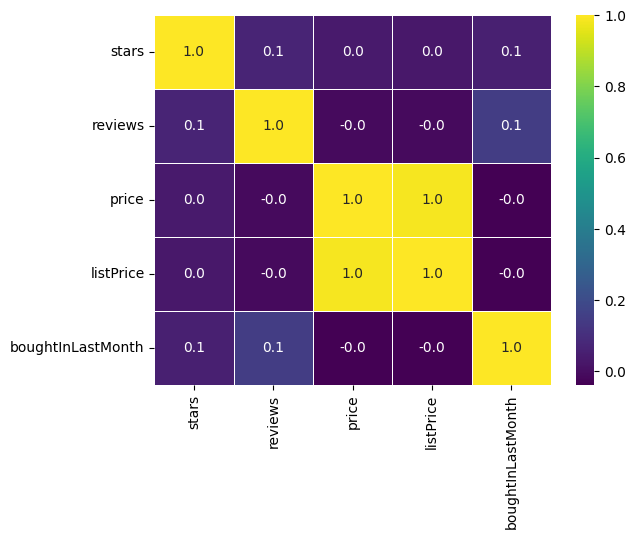

In [216]:

subset_columns = ['stars', 'reviews', 'price','listPrice','boughtInLastMonth']
dat=datawithcategory[subset_columns]
correlation_matrix = dat.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".1f", linewidths=.5)
plt.show()

In [147]:
datawithcategory=pd.read_csv('../data/clean_amazonca_withcategory.csv')
#data.describe()

This method makes an assumption about the uniform distribution of sales, and it might not accurately reflect the true pattern of sales over time. If I later obtain date information, I can refine your analysis and visualization.

Remember to replace 'someColumn' with the appropriate column in your DataFrame that might represent days.

Please note that without a specific date column, the analysis is somewhat simplified, and the results may not capture variations in sales over time.







In [148]:
# Replace 'someColumn' with the appropriate column that might represent days
#total_days = df['someColumn'].nunique()
total_days =31

# Calculate average products sold per day
datawithcategory['avg_products_per_day'] = round(datawithcategory['boughtInLastMonth'] / total_days).astype(int)



In [149]:
datawithcategory.shape

(166649, 13)

In [150]:
datawithcategory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166649 entries, 0 to 166648
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   asin                  166649 non-null  object 
 1   title                 166649 non-null  object 
 2   imgUrl                166649 non-null  object 
 3   productURL            166649 non-null  object 
 4   stars                 166649 non-null  float64
 5   reviews               166649 non-null  int64  
 6   price                 166649 non-null  float64
 7   listPrice             166649 non-null  float64
 8   categoryName          166649 non-null  object 
 9   isBestSeller          166649 non-null  bool   
 10  boughtInLastMonth     166649 non-null  int64  
 11  mainCategory          146634 non-null  object 
 12  avg_products_per_day  166649 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 15.4+ MB


In [151]:
datawithcategory.describe()

,stars,reviews,price,listPrice,boughtInLastMonth,avg_products_per_day
count,166649.000000,166649.000000,166649.000000,166649.000000,166649.000000,166649.000000
mean,4.059658,1538.714268,50.421619,60.453717,32.154708,1.047573
std,1.095613,8205.360235,76.992933,90.567272,215.280538,6.946579
min,0.000000,0.000000,0.010000,1.690000,0.000000,0.000000
25%,4.000000,15.000000,15.990000,19.680000,0.000000,0.000000
50%,4.400000,117.000000,25.950000,30.990000,0.000000,0.000000
75%,4.600000,718.000000,49.950000,59.980000,0.000000,0.000000
max,5.000000,868865.000000,950.000000,999.990000,20000.000000,645.000000


In [152]:
result=datawithcategory[datawithcategory['boughtInLastMonth']>100]
result

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth,mainCategory,avg_products_per_day
18,B0BLCB57TT,Foam Only 1 pair used earplug you will get.,https://m.media-amazon.com/images/I/31ktXCXORs...,https://www.amazon.ca/dp/B0BLCB57TT,4.1,149,10.99,13.99,Industrial Scientific,False,200,Hardware & Tools,6
47,B07QLTDQ3W,"CRAFTSMAN 20 Oz Hammer, Alloy Steel Smooth Hea...",https://m.media-amazon.com/images/I/415wp45Zcd...,https://www.amazon.ca/dp/B07QLTDQ3W,4.7,763,19.99,36.99,Industrial Scientific,False,200,Hardware & Tools,6
641,B008BV7NN2,WD-40 Multi-Use Product 155g Can - Drives Out ...,https://m.media-amazon.com/images/I/812FMoXbZ9...,https://www.amazon.ca/dp/B008BV7NN2,4.7,215,5.98,6.99,Motorcycle Accessories Parts,True,900,Automotive,29
642,B071DQSZB8,"Hydration Bladder, 2L Water Bladder for Hiking...",https://m.media-amazon.com/images/I/71qfMx9o+3...,https://www.amazon.ca/dp/B071DQSZB8,4.3,17381,12.99,16.79,Motorcycle Accessories Parts,True,900,Automotive,29
643,B0CJF4ZT4G,2pcs Bikenda Electromagnetic Molecular Interfe...,https://m.media-amazon.com/images/I/71Nar5MW-V...,https://www.amazon.ca/dp/B0CJF4ZT4G,5.0,1,21.69,35.91,Motorcycle Accessories Parts,True,200,Automotive,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164071,B07C1D578J,"BioSteel 100% Whey Protein Powder, rBGH Hormon...",https://m.media-amazon.com/images/I/71JlTd1Kg3...,https://www.amazon.ca/dp/B07C1D578J,4.2,1084,41.56,49.99,"Vitamins, Minerals Supplements",False,500,NaN,16
164072,B005TYMZTQ,"ALLMAX Isoflex Vanilla, 5 Pound",https://m.media-amazon.com/images/I/61k6KdITSj...,https://www.amazon.ca/dp/B005TYMZTQ,4.4,3455,87.99,93.99,"Vitamins, Minerals Supplements",False,400,NaN,13
164073,B001181M16,EFX Sports Kre-Alkalyn | PH-Correct Creatine M...,https://m.media-amazon.com/images/I/61ObTuusVF...,https://www.amazon.ca/dp/B001181M16,4.4,2506,37.99,39.99,"Vitamins, Minerals Supplements",False,400,NaN,13
164074,B09Y2LJ7PK,LEANFIT Sport Grass-Fed 100% WHEY ISOLATE Prot...,https://m.media-amazon.com/images/I/71hWKkcVdq...,https://www.amazon.ca/dp/B09Y2LJ7PK,4.1,112,66.66,69.99,"Vitamins, Minerals Supplements",False,200,NaN,6


In [215]:
from IPython.display import display, HTML, Image
best_sellers['discount_amount'] = best_sellers['listPrice'] - best_sellers['price']

def display_images(main_category, df, label):
    for index, row in df.iterrows():
        print(f"{label} in {main_category} - {row['title']}")
        print(f"Price: {row['price']} CAD")
        print(f"Rating: {row['stars']} stars")
        print(f"Reviews: {row['reviews']} reviews")
        if row['listPrice'] > 0:
            print(f"Discount: {round((row['listPrice'] - row['price']) / row['listPrice'] * 100, 2)}%")
            print(f"second Discount: {round((row['listPrice'] - row['price'])*100 / row['listPrice'] , 2)}%")
        display(Image(url=row['imgUrl'], width=200, unconfined=True))
        print("-"*50)

for main_category in best_sellers['mainCategory'].unique():
    print(f"Main Category: {main_category}\n")
    min_price_product = best_sellers[best_sellers['mainCategory'] == main_category].nsmallest(1, 'price')
    max_price_product = best_sellers[best_sellers['mainCategory'] == main_category].nlargest(1, 'price')
    
    # Correct the reference to 'discount_amount' here
    max_discount_product = best_sellers[best_sellers['mainCategory'] == main_category].nlargest(1, 'discount_amount')

    display_images(main_category, min_price_product, "Lowest Priced Product")
    display_images(main_category, max_price_product, "Highest Priced Product")
    display_images(main_category, max_discount_product, "Product with Highest Discount")

Main Category: Hardware & Tools

Lowest Priced Product in Hardware & Tools - Safety 1st HS2700300 OutSmart Multi-Use Lock, White
Price: 4.97 CAD
Rating: 4.6 stars
Reviews: 1791 reviews
Discount: 44.72%
second Discount: 44.72%


--------------------------------------------------
Highest Priced Product in Hardware & Tools - DEWALT 20V MAX* Portable Band Saw, Deep Cut, Tool Only (DCS374B)
Price: 399.0 CAD
Rating: 4.8 stars
Reviews: 1336 reviews
Discount: 23.12%
second Discount: 23.12%


--------------------------------------------------
Product with Highest Discount in Hardware & Tools - DEWALT Miter Saw, Double-Bevel, Compound, 12-Inch, 15-Amp (DWS716)
Price: 399.0 CAD
Rating: 4.7 stars
Reviews: 339 reviews
Discount: 32.26%
second Discount: 32.26%


--------------------------------------------------
Main Category: Automotive

Lowest Priced Product in Automotive - 8pcs Screw Rotor Brake Disc Retaining 93600-06014-0H - Set is Best Replacement for Honda, Acura, Hyundai, Kia, Mazda - Front and Rear Stainless Steel Retaining Screws by Automajor
Price: 4.99 CAD
Rating: 4.4 stars
Reviews: 708 reviews
Discount: 33.56%
second Discount: 33.56%


--------------------------------------------------
Highest Priced Product in Automotive - LiTime 12V 100Ah MINI LiFePO4 Lithium Battery, Upgraded 100A BMS, 10-Year Lifespan with Up to 15000 Cycles, Max. 1280Wh Energy LiFePO4 Battery in Small Size, Perfect for RV, Solar, Trolling Motor
Price: 449.99 CAD
Rating: 4.7 stars
Reviews: 2785 reviews
Discount: 10.0%
second Discount: 10.0%


--------------------------------------------------
Product with Highest Discount in Automotive - G-PLUS Fender Flares, Compatible with 2007-2013 Chevy Silverado 1500/2007-2014 Silverado 2500HD 3500HD, 78.0"/97.6" Long Bed(for Regular Cab and Extended Cab), Textured Rivet 4pcs
Price: 250.74 CAD
Rating: 4.0 stars
Reviews: 1130 reviews
Discount: 23.23%
second Discount: 23.23%


--------------------------------------------------
Main Category: Home & Kitchen

Lowest Priced Product in Home & Kitchen - Dawn Ultra Dish Soap, EZ-Squeeze Dishwashing Liquid, Original Scent, 650 mL
Price: 3.97 CAD
Rating: 4.8 stars
Reviews: 1442 reviews
Discount: 20.44%
second Discount: 20.44%


--------------------------------------------------
Highest Priced Product in Home & Kitchen - Breville Barista Express Espresso Machine, Brushed Stainless Steel, BES870XL
Price: 799.97 CAD
Rating: 4.5 stars
Reviews: 22226 reviews
Discount: 20.0%
second Discount: 20.0%


--------------------------------------------------
Product with Highest Discount in Home & Kitchen - Breville Barista Express Espresso Machine, Brushed Stainless Steel, BES870XL
Price: 799.97 CAD
Rating: 4.5 stars
Reviews: 22226 reviews
Discount: 20.0%
second Discount: 20.0%


--------------------------------------------------
Main Category: Arts & Crafts

Lowest Priced Product in Arts & Crafts - Crayola 10 59ml Paint Jars Assorted Classic Colours Arts & Crafts
Price: 6.97 CAD
Rating: 4.7 stars
Reviews: 6721 reviews
Discount: 22.38%
second Discount: 22.38%


--------------------------------------------------
Highest Priced Product in Arts & Crafts - Melissa and Doug Deluxe Double-Sided Tabletop Easel (Arts and Crafts, Sturdy Wooden Construction, 42 Pieces, 44.45 cm H x 52.705 cm W x 6.985 cm L)
Price: 56.24 CAD
Rating: 4.6 stars
Reviews: 6554 reviews
Discount: 24.42%
second Discount: 24.42%


--------------------------------------------------
Product with Highest Discount in Arts & Crafts - Melissa and Doug Deluxe Double-Sided Tabletop Easel (Arts and Crafts, Sturdy Wooden Construction, 42 Pieces, 44.45 cm H x 52.705 cm W x 6.985 cm L)
Price: 56.24 CAD
Rating: 4.6 stars
Reviews: 6554 reviews
Discount: 24.42%
second Discount: 24.42%


--------------------------------------------------
Main Category: Fashion

Lowest Priced Product in Fashion - Dr. Scholl's ULTRA AIR-PILLO Insoles. Cushioning Molds to Your Foot and Absorbs Shock for All-Day Comfort (One Size fits Men's 7-13 & Women's 5-10)
Price: 4.77 CAD
Rating: 4.3 stars
Reviews: 421 reviews
Discount: 23.43%
second Discount: 23.43%


--------------------------------------------------
Highest Priced Product in Fashion - Heated Jacket with 12V Battery Pack Winter Outdoor Soft Shell Electric Heating Coat
Price: 189.99 CAD
Rating: 4.2 stars
Reviews: 7188 reviews
Discount: 13.64%
second Discount: 13.64%


--------------------------------------------------
Product with Highest Discount in Fashion - Jackets for Women Long Sleeve Open Front Casual Jackets Fashion Fall Oversized Party Cardigan Coat Outerwear
Price: 22.29 CAD
Rating: 5.0 stars
Reviews: 4 reviews
Discount: 81.42%
second Discount: 81.42%


--------------------------------------------------
Main Category: Home & Garden

Lowest Priced Product in Home & Garden - TERRO Ant Killer Liquid Baits T300CAN
Price: 5.0 CAD
Rating: 4.2 stars
Reviews: 6601 reviews
Discount: 37.34%
second Discount: 37.34%


--------------------------------------------------
Highest Priced Product in Home & Garden - Giantex Rocking Chair Upholstered Living Room Chair with Padded Back and Seat, Wood Base, Rocking Chair for Nursery (Gray)
Price: 399.99 CAD
Rating: 4.2 stars
Reviews: 110 reviews
Discount: 9.09%
second Discount: 9.09%


--------------------------------------------------
Product with Highest Discount in Home & Garden - Snow Joe 24V-X2-SB18 18-Inch 48-Volt 4-Ah Cordless Snow Blower, (2 x 4.0Ah Batteries and Charger) Blue
Price: 398.0 CAD
Rating: 3.8 stars
Reviews: 4288 reviews
Discount: 26.57%
second Discount: 26.57%


--------------------------------------------------
Main Category: Sports & Outdoors

Lowest Priced Product in Sports & Outdoors - Super Stroke Golf- 2017 Cross Comfort Standard Grip
Price: 4.87 CAD
Rating: 4.4 stars
Reviews: 654 reviews
Discount: 38.9%
second Discount: 38.9%


--------------------------------------------------
Highest Priced Product in Sports & Outdoors - Shearwater Research Peregrine Dive Computer
Price: 636.2 CAD
Rating: 4.8 stars
Reviews: 256 reviews
Discount: 10.24%
second Discount: 10.24%


--------------------------------------------------
Product with Highest Discount in Sports & Outdoors - SWONDER Towable Floater PRO, Watersports Towable Ball with Heavy Duty Full Nylon Cover, 60ft Tow Rope for 1-4 Rider Towable Tubes
Price: 69.99 CAD
Rating: 4.4 stars
Reviews: 31 reviews
Discount: 56.25%
second Discount: 56.25%


--------------------------------------------------
Main Category: Electronics & Tech

Lowest Priced Product in Electronics & Tech - M.2 Screw Kit,NVMe Screw m.2 SSD Mounting Kit
Price: 6.99 CAD
Rating: 4.5 stars
Reviews: 7114 reviews
Discount: 41.7%
second Discount: 41.7%


--------------------------------------------------
Highest Priced Product in Electronics & Tech - All-New Blink Outdoor 4 (4th Gen) + Blink Mini – Smart security camera, two-way talk, HD live view, motion detection, set up in minutes, Works with Alexa – 8 camera system + Mini (black)
Price: 894.98 CAD
Rating: 3.4 stars
Reviews: 41 reviews
Discount: 5.29%
second Discount: 5.29%


--------------------------------------------------
Product with Highest Discount in Electronics & Tech - Garmin Edge 1030 Plus, Gps Cycling/bike Computer, On-device Workout Suggestions, Climbpro Pacing Guidance and More
Price: 593.4 CAD
Rating: 4.7 stars
Reviews: 760 reviews
Discount: 31.79%
second Discount: 31.79%


--------------------------------------------------
Main Category: Beauty & Personal Care

Lowest Priced Product in Beauty & Personal Care - GUM Proxabrush Go-Betweens Interdental Brushes, Ultra-Tight, Plaque Removal, Red , 8 Count
Price: 3.99 CAD
Rating: 4.6 stars
Reviews: 2913 reviews
Discount: 27.32%
second Discount: 27.32%


--------------------------------------------------
Highest Priced Product in Beauty & Personal Care - Revlon RVDR5222F One-Step Volumizer and Ionic Hair Dryer with Advanced Ionic Technology, Hot Air Brush, Less Frizz, 3 Heat/ 2 Speed Settings, Black
Price: 63.74 CAD
Rating: 4.5 stars
Reviews: 49838 reviews
Discount: 8.93%
second Discount: 8.93%


--------------------------------------------------
Product with Highest Discount in Beauty & Personal Care - Under Eye Mask - Reduce Dark Circles, Puffy Eyes, Undereye Bags, Wrinkles - Gel Under Eye Patches, Vegan Cruelty-Free Self Care by grace and stella (24 Pairs, Gold)
Price: 25.95 CAD
Rating: 4.4 stars
Reviews: 17028 reviews
Discount: 54.91%
second Discount: 54.91%


--------------------------------------------------
Main Category: Travel Essentials

Lowest Priced Product in Travel Essentials - Womens RFID Blocking Small Compact Bifold Luxury Genuine Leather Pocket Wallet Ladies Mini Purse with ID Window (01 ReNapa Black)
Price: 12.3 CAD
Rating: 4.4 stars
Reviews: 34553 reviews
Discount: 8.82%
second Discount: 8.82%


--------------------------------------------------
Highest Priced Product in Travel Essentials - Luggage Sets Expandable PC+ABS Durable Suitcase Sets Double Wheels TSA Lock 4 Piece Luggage Set Sky Blue
Price: 294.49 CAD
Rating: 4.5 stars
Reviews: 4262 reviews
Discount: 10.76%
second Discount: 10.76%


--------------------------------------------------
Product with Highest Discount in Travel Essentials - Unisex-Adult SWISSGEAR 28 inch Hardside Expandable Luggage Luggage- Suitcase
Price: 97.24 CAD
Rating: 4.5 stars
Reviews: 72 reviews
Discount: 30.52%
second Discount: 30.52%


--------------------------------------------------
Main Category: Party & Sationery & Office Supply

Lowest Priced Product in Party & Sationery & Office Supply - D'Addario Set Banjo Phos Bronze Med (EJ55)
Price: 6.5 CAD
Rating: 4.5 stars
Reviews: 4618 reviews
Discount: 49.96%
second Discount: 49.96%


--------------------------------------------------
Highest Priced Product in Party & Sationery & Office Supply - SHW 55-Inch Large Electric Height Adjustable Standing Desk, 140 x 71 cm, Maple
Price: 299.87 CAD
Rating: 4.5 stars
Reviews: 19410 reviews
Discount: 9.13%
second Discount: 9.13%


--------------------------------------------------
Product with Highest Discount in Party & Sationery & Office Supply - GERTTRONY Ergonomic Office Chair Chaise Task with Lumbar Support Mesh Computer Flip up Armrests Swivel Executive Desk for Home Conference Room (Black/Black)
Price: 98.95 CAD
Rating: 4.1 stars
Reviews: 734 reviews
Discount: 50.52%
second Discount: 50.52%


--------------------------------------------------
Main Category: Pet Supplies

Lowest Priced Product in Pet Supplies - FELINE GREENIES Cat Treats SMARTBITES Healthy Indoor Natural Dental Care, Chicken Flavour, 2.1oz Pouch
Price: 2.98 CAD
Rating: 4.7 stars
Reviews: 6414 reviews
Discount: 33.63%
second Discount: 33.63%


--------------------------------------------------
Highest Priced Product in Pet Supplies - VIVOHOME 53 Inch Wrought Iron Large Bird Cage with Rolling Stand for Parrots Conures Lovebird Cockatiel Parakeets
Price: 169.99 CAD
Rating: 4.6 stars
Reviews: 836 reviews
Discount: 15.0%
second Discount: 15.0%


--------------------------------------------------
Product with Highest Discount in Pet Supplies - 44 lb Seiryu Rock Stone for Aquariums, Landscaping Model,Tank Decoration
Price: 70.99 CAD
Rating: 4.8 stars
Reviews: 7 reviews
Discount: 41.81%
second Discount: 41.81%


--------------------------------------------------
Main Category: Health & Wellness & Baby Products

Lowest Priced Product in Health & Wellness & Baby Products - Baby Gourmet Oatmeal Cereal, 1-Pack
Price: 4.47 CAD
Rating: 4.6 stars
Reviews: 405 reviews
Discount: 18.58%
second Discount: 18.58%


--------------------------------------------------
Highest Priced Product in Health & Wellness & Baby Products - Evenflo Revolve360 Slim 2-in-1 Rotational Car Seat - Canton
Price: 429.99 CAD
Rating: 4.2 stars
Reviews: 17 reviews
Discount: 28.33%
second Discount: 28.33%


--------------------------------------------------
Product with Highest Discount in Health & Wellness & Baby Products - Evenflo Revolve360 Slim 2-in-1 Rotational Car Seat - Canton
Price: 429.99 CAD
Rating: 4.2 stars
Reviews: 17 reviews
Discount: 28.33%
second Discount: 28.33%


--------------------------------------------------
Main Category: Toys & Games

Lowest Priced Product in Toys & Games - Metal Original Slinky in Box, Single Item, Silver
Price: 4.99 CAD
Rating: 4.1 stars
Reviews: 37036 reviews
Discount: 16.69%
second Discount: 16.69%


--------------------------------------------------
Highest Priced Product in Toys & Games - Radio Flyer 3-In-1 EZ Folding, Outdoor Collapsible Wagon for Kids & Cargo, Red
Price: 212.47 CAD
Rating: 4.6 stars
Reviews: 17847 reviews
Discount: 15.01%
second Discount: 15.01%


--------------------------------------------------
Product with Highest Discount in Toys & Games - Puzzle Board with Drawers & Cover Mat - Wooden Jigsaw Puzzle Table for 1000 Pieces - 24”x30” Portable Puzzle Table for Adults & Children - Colorful Puzzle Trays for Sorting - by Puzzle Ready
Price: 108.99 CAD
Rating: 4.4 stars
Reviews: 4630 reviews
Discount: 27.34%
second Discount: 27.34%


--------------------------------------------------
Main Category: Grocery

Lowest Priced Product in Grocery - Betty Crocker Butter and Herb Mashed Potato, 215 Gram
Price: 1.77 CAD
Rating: 4.6 stars
Reviews: 3115 reviews
Discount: 36.1%
second Discount: 36.1%


--------------------------------------------------
Highest Priced Product in Grocery - VAHDAM, High Mountain Oolong Tea Leaves From Himalayas - 340g/12oz (170 Cups) High Elevation Grown | Vacuum Sealed | Brew Hot, Iced Or Kombucha Tea | Loose Leaf Tea
Price: 39.99 CAD
Rating: 4.4 stars
Reviews: 9191 reviews
Discount: 20.0%
second Discount: 20.0%


--------------------------------------------------
Product with Highest Discount in Grocery - VAHDAM, High Mountain Oolong Tea Leaves From Himalayas - 340g/12oz (170 Cups) High Elevation Grown | Vacuum Sealed | Brew Hot, Iced Or Kombucha Tea | Loose Leaf Tea
Price: 39.99 CAD
Rating: 4.4 stars
Reviews: 9191 reviews
Discount: 20.0%
second Discount: 20.0%


--------------------------------------------------


In [204]:
best_sellers.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth,mainCategory,discount_amount,discount_percent
0,B00VHVNXN2,E-TING 4pcs Hand Tool Toggle Clamp Red Plast H...,https://m.media-amazon.com/images/I/51m3lnaFtg...,https://www.amazon.ca/dp/B00VHVNXN2,4.3,1372,16.99,18.99,Industrial Scientific,True,50,Hardware & Tools,2.00,10.531859
1,B00VEA2904,"DEWALT 20V MAX* Portable Band Saw, Deep Cut, T...",https://m.media-amazon.com/images/I/71Gp5A9Pnp...,https://www.amazon.ca/dp/B00VEA2904,4.8,1336,399.00,519.00,Industrial Scientific,True,50,Hardware & Tools,120.00,23.121387
2,B0B7W54V3V,"Periodic Table with Real Elements Inside, Acry...",https://m.media-amazon.com/images/I/71fnnB7EZm...,https://www.amazon.ca/dp/B0B7W54V3V,4.5,116,39.88,59.99,Industrial Scientific,True,50,Hardware & Tools,20.11,33.522254
3,B0089FMXN0,Neoprene Rubber Black Self-Adhesive Sponge Str...,https://m.media-amazon.com/images/I/61TgKSfDLJ...,https://www.amazon.ca/dp/B0089FMXN0,4.2,176,12.88,13.88,Industrial Scientific,True,0,Hardware & Tools,1.00,7.204611
4,B01MRYMRF7,"meite 22G71S38 22 Gauge 71 Series 3/8"" Crown W...",https://m.media-amazon.com/images/I/71bJTiaqXw...,https://www.amazon.ca/dp/B01MRYMRF7,4.6,226,19.99,21.99,Industrial Scientific,True,50,Hardware & Tools,2.00,9.095043


In [205]:
best_sellers_outlier=best_sellers[(best_sellers['price']> best_sellers['listPrice'])].value_counts()
best_sellers_outlier

Series([], Name: count, dtype: int64)

Price Distribution

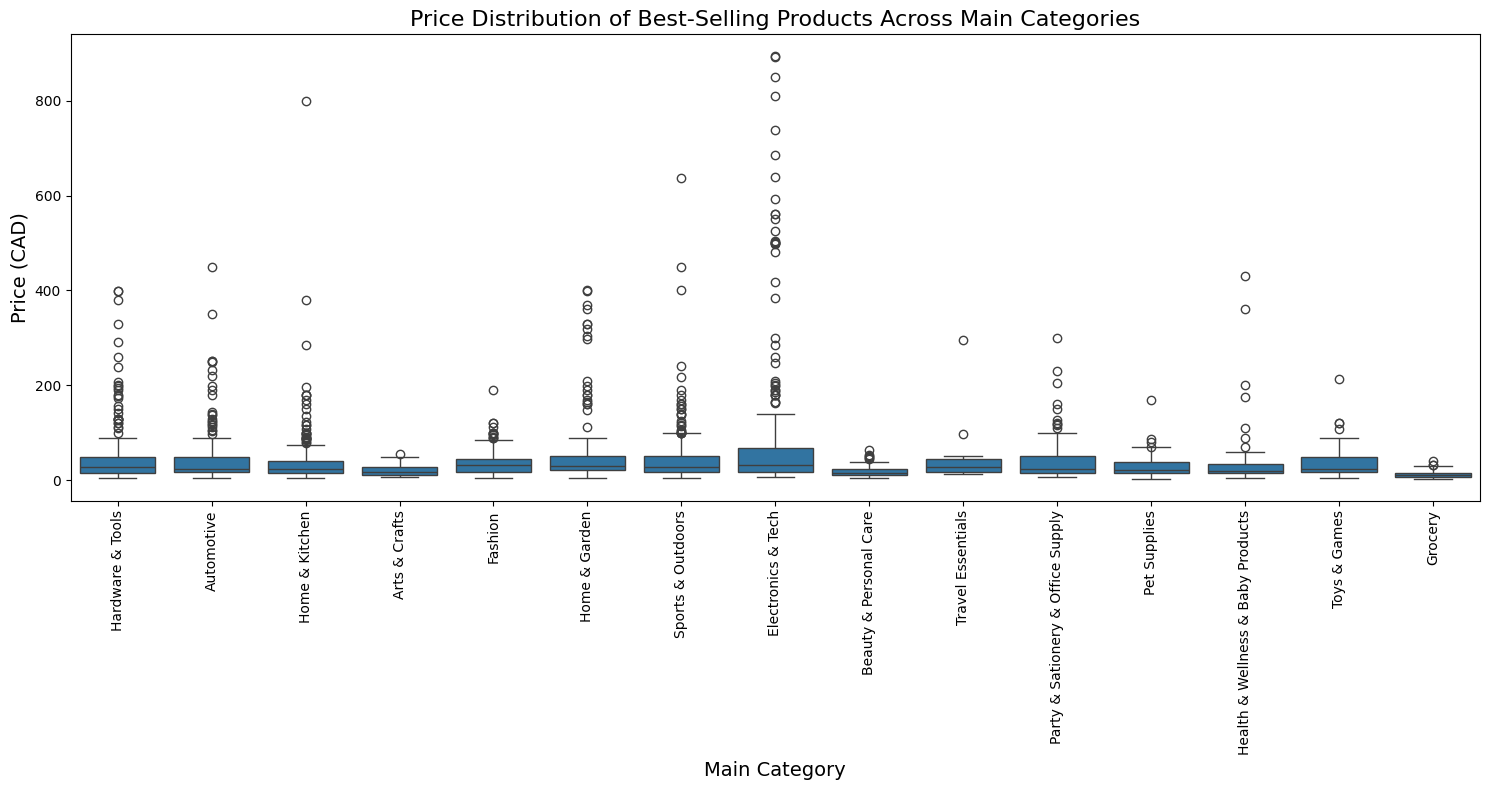

In [206]:
plt.figure(figsize=(15,8))
sns.boxplot(x=best_sellers['mainCategory'], y=best_sellers['price'])
plt.xticks(rotation=90)  
plt.title('Price Distribution of Best-Selling Products Across Main Categories', fontsize=16)
plt.xlabel('Main Category', fontsize=14)
plt.ylabel('Price (CAD)', fontsize=14)
plt.tight_layout()
plt.show()





This box plot shows us the price distribution of best-selling products across various main categories. Here's a brief interpretation:

"Electronics" and "Health & Wellness" have a wide price range, with some high-priced outliers, indicating a diverse product range from low to high-end.
"Home & Kitchen" has a higher median price, suggesting that its best-sellers tend to be on the pricier side.
On the other hand, "Fashion" and "Hardware & Tools" have lower median prices, indicating that their best-sellers are more affordable.
"Fashion," and "Hardware & Tools" show a tight price distribution, meaning there's less variability in the prices of their best-selling products.


Distribution of Star Ratings

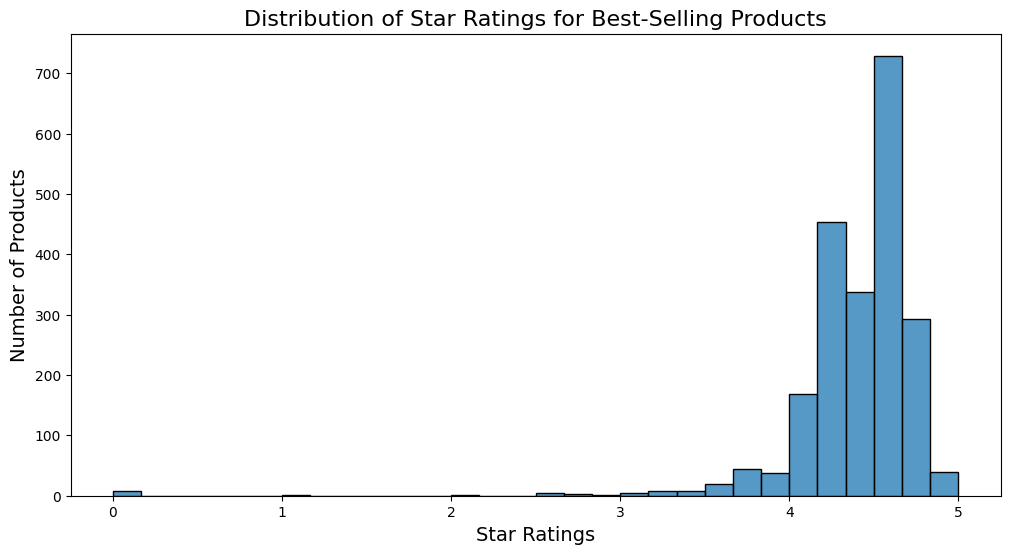

In [207]:
plt.figure(figsize=(12,6))
sns.histplot(best_sellers['stars'], kde=False, bins=30)
plt.title('Distribution of Star Ratings for Best-Selling Products', fontsize=16)
plt.xlabel('Star Ratings', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.show()

 Distribution of Review Counts

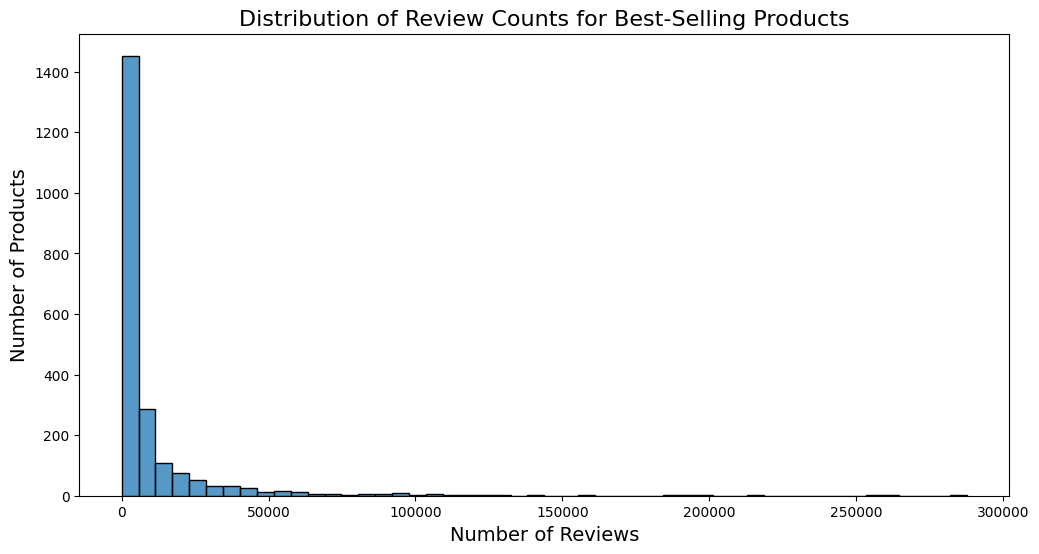

In [208]:
plt.figure(figsize=(12,6))
sns.histplot(best_sellers['reviews'], kde=False, bins=50)
plt.title('Distribution of Review Counts for Best-Selling Products', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.show()

Average Discount Amount by Main Category

/var/folders/gb/dkdpjd856zn4txpk1klt_x600000gn/T/ipykernel_44226/827295963.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_discounts.index, y=average_discounts.values, palette="viridis")


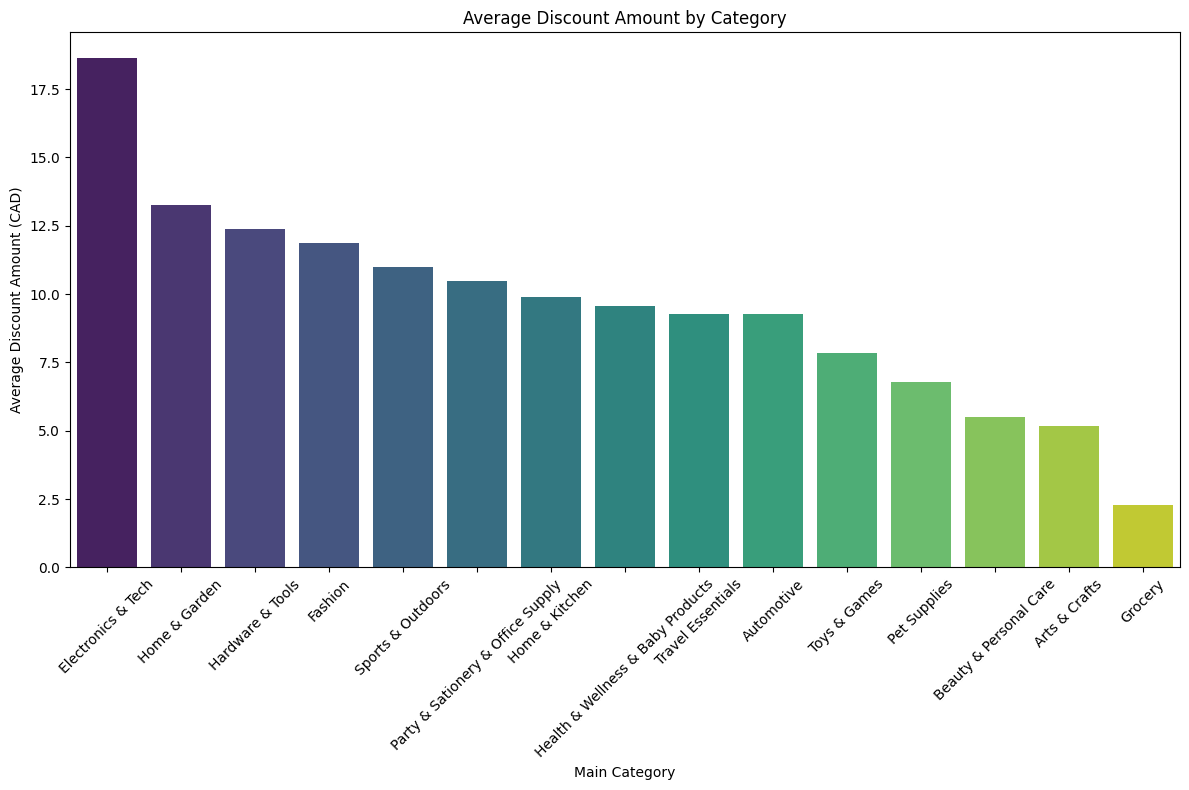

In [209]:
# Computing average discount amount by category
average_discounts = best_sellers.groupby('mainCategory')['discount_amount'].mean().sort_values(ascending=False)

# Visualizing using a bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x=average_discounts.index, y=average_discounts.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel('Average Discount Amount (CAD)')
plt.xlabel('Main Category')
plt.title('Average Discount Amount by Category')
plt.tight_layout()
plt.show()

We can derive a few observations:

Electronics & Tech category offers the highest average discount amount among all the categories. This might be due to the competitive nature of the tech industry or the higher original price points which allows for larger discounts in absolute dollar amounts.
The second and third highest average discount amounts are in the Fashion and Sports & Outdoors categories respectively.
Home & Kitchen offers the least discount on average, which might suggest that these products either have a lower markup or are less frequently on promotion compared to other categories.

average Rating by Main Category

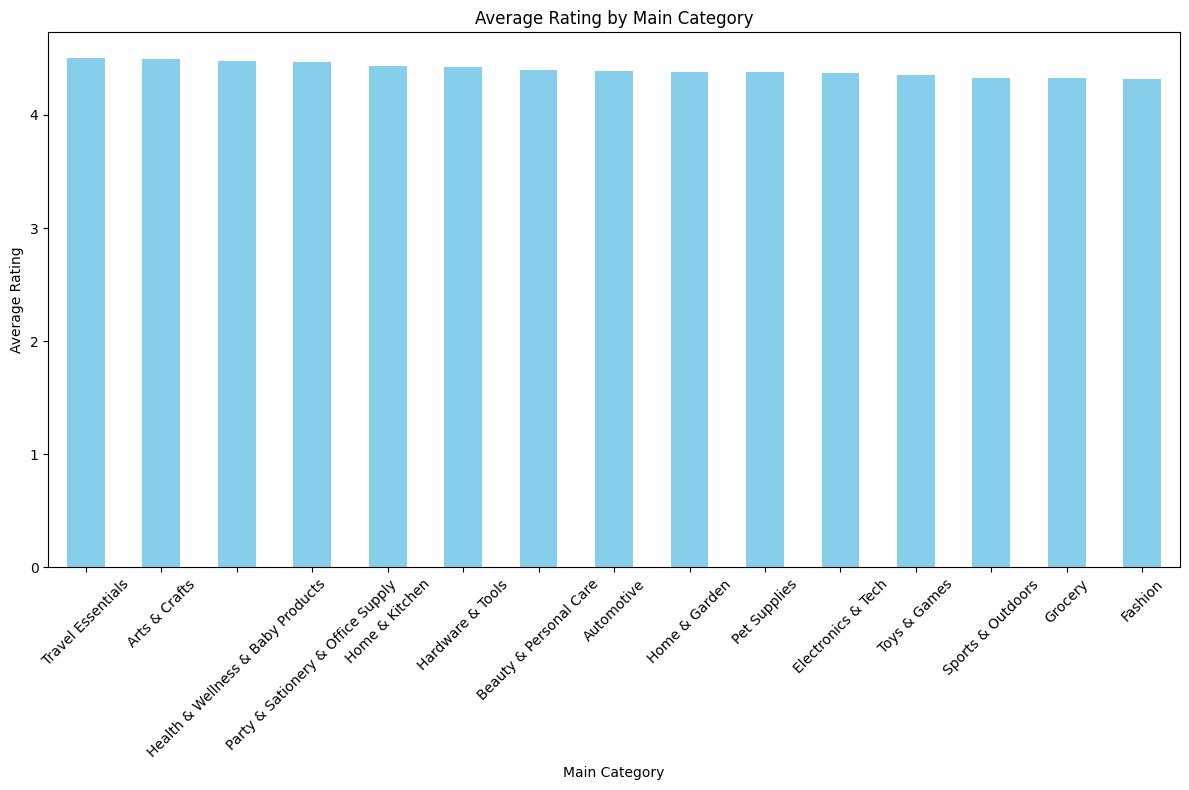

In [210]:
# Grouping by 'mainCategory' and calculating the mean for 'stars' column
avg_ratings = best_sellers.groupby('mainCategory')['stars'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12,8))
avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This graph depicts a very consistent average rating across different main categories. Here's a brief interpretation:

Consistent Quality Across Categories: One possible interpretation is that the products across these main categories have a consistently good quality, leading to similar average ratings. It could suggest that the sellers or brands under these categories maintain a consistent standard of quality.
Customer Expectations: Another perspective is that customer expectations might be aligned well with what is being delivered in these categories. If there were a significant discrepancy between expectations and actual product quality, we would likely see more variance in the ratings.
Review Bias: People tend to review products when they have strong feelings, either very positive or very negative. A consistent average could suggest that there isn't a predominant bias in the type of reviews being left (i.e., more people aren't just leaving positive or just negative reviews).
Data Skewness: If there's a preponderance of products with very few reviews, the average rating might be skewed. It might be worth looking into the distribution of reviews. For example, a product with a single 5-star review will have an average rating of 5, but it might not be as trustworthy as a product with hundreds of reviews averaging 4.5 stars.
Further Exploration:

Distribution of Ratings: Instead of just the average, we should look at the distribution of ratings for each category. This would show if a category has a lot of extreme ratings (either 1s or 5s) versus another that might have more ratings clustered around the mean.
Review Count Analysis: Also we can analyze the number of reviews for products. Categories with products that have many reviews might be more trustworthy in their average rating than those with fewer reviews.

Distribution of Ratings

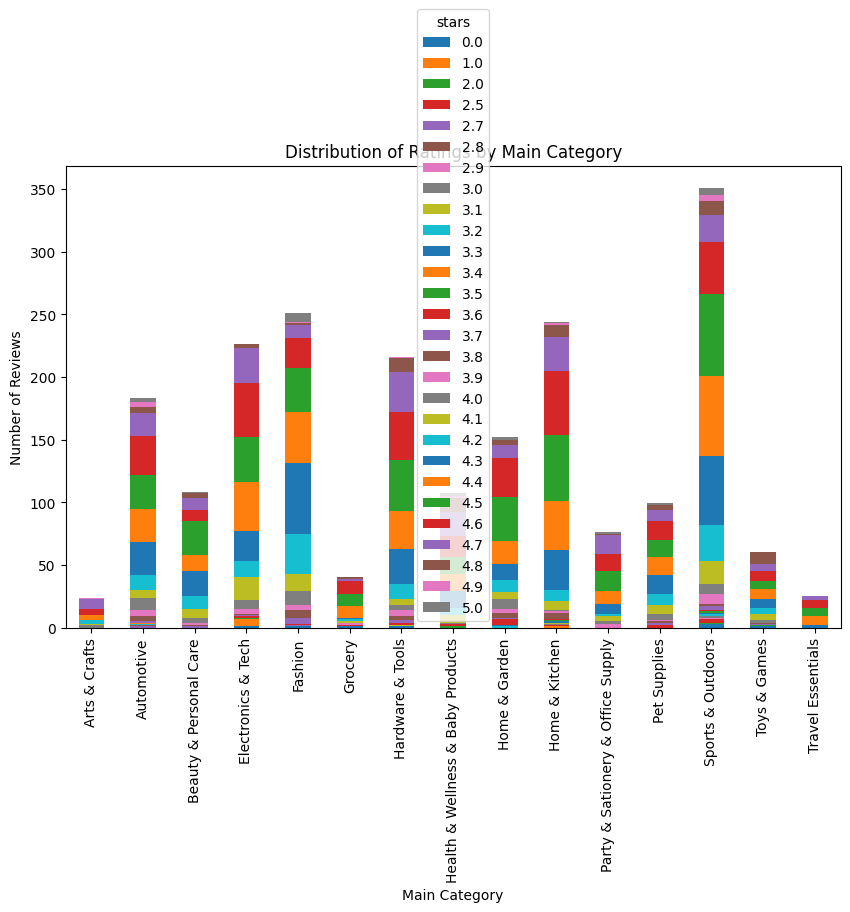

In [211]:
# Grouping by mainCategory and stars and counting the number of occurrences
rating_distribution = best_sellers.groupby(['mainCategory', 'stars']).size().unstack()

# Plotting
rating_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Ratings by Main Category')
plt.ylabel('Number of Reviews')
plt.xlabel('Main Category')
plt.show()

This chart displays the distribution of product ratings across various categories:

Electronics & Tech has a concentration of products with ratings from 4.6 to 4.8, showing high satisfaction.
Fashion predominantly falls within the 4.0 to 4.7 range.
Automotive has a broader spread, with peaks at ratings of 3.6 and 4.6.
Categories like Health & Wellness, Home & Kitchen, and Sports & Outdoors have fewer reviews!
Outliers are observed in Sports & Outdoors and Automotive, with some products rated as low as 1.0.

Total Number of Reviews

/var/folders/gb/dkdpjd856zn4txpk1klt_x600000gn/T/ipykernel_44226/3748978380.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='reviews', y='mainCategory', data=reviews_by_category, palette='viridis')


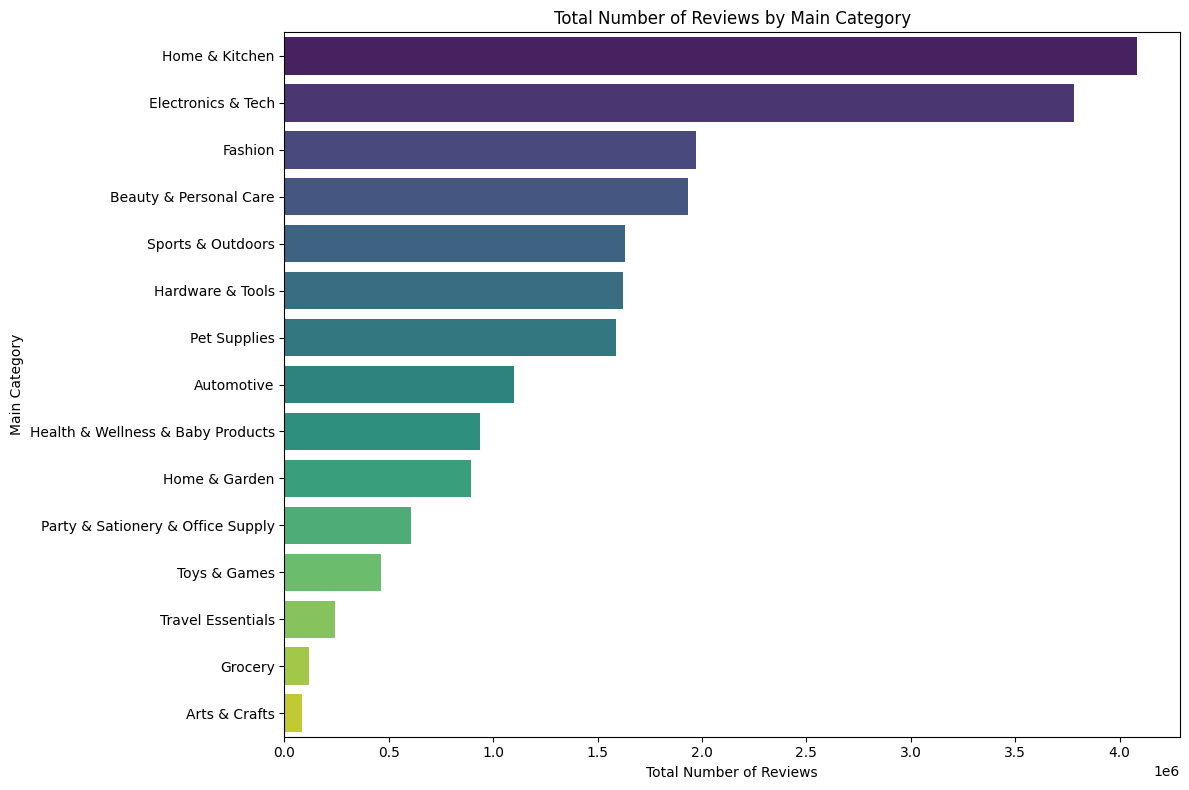

In [212]:
# Grouping by mainCategory and summing the reviews
reviews_by_category = best_sellers.groupby('mainCategory')['reviews'].sum().reset_index()

# Sorting the data for better visualization
reviews_by_category = reviews_by_category.sort_values(by='reviews', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='reviews', y='mainCategory', data=reviews_by_category, palette='viridis')
plt.title('Total Number of Reviews by Main Category')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Main Category')
plt.tight_layout()
plt.show()

Based on this visualization, the "Electronics & Tech", "Beauty & Personal Care", and "Home & Kitchen" categories have a higher number of reviews, suggesting that their star ratings might be more reliable. However, it's important to note that this could be related to the number of products in each category. To get a clearer picture, we should examine the average number of reviews per product in these categories.



 Average Reviews per Product

In [213]:
# Group by mainCategory and calculate the total number of reviews and unique product count
grouped = best_sellers.groupby('mainCategory').agg(total_reviews=('reviews', 'sum'), 
                                                  total_products=('asin', 'nunique'))

# Calculate the average number of reviews per product
grouped['avg_reviews_per_product'] = grouped['total_reviews'] / grouped['total_products']

# Sort the categories based on the average number of reviews per product
sorted_categories = grouped.sort_values(by='avg_reviews_per_product', ascending=False)

print(sorted_categories[['avg_reviews_per_product']])

                                   avg_reviews_per_product
mainCategory                                              
Beauty & Personal Care                        17876.990741
Home & Kitchen                                16742.823770
Electronics & Tech                            16736.035398
Pet Supplies                                  16037.898990
Travel Essentials                              9649.320000
Health & Wellness & Baby Products              8758.803738
Party & Sationery & Office Supply              7996.105263
Fashion                                        7850.450199
Toys & Games                                   7691.033333
Hardware & Tools                               7505.481481
Automotive                                     6002.918033
Home & Garden                                  5889.789474
Sports & Outdoors                              4643.706553
Arts & Crafts                                  3415.750000
Grocery                                        2915.0000

From the bar chart:

"Electronics & Tech", "Beauty & Personal Care", and "Home & Kitchen" have the highest total number of reviews. This suggests that products in these categories generally attract a larger audience or have been on the market for a longer period, leading to more reviews.
From the table:

"Home & Kitchen" products receive about 27,694 reviews on average.
"Beauty & Personal Care" products get an average of 18,897 reviews.
"Electronics & Tech" items average around 18,411 reviews.
Combining these insights:

"Home & Kitchen" not only has a high total number of reviews but also tops the list with the highest average reviews per product. This implies that not only are there many products in this category that are reviewed, but each individual product also tends to receive a large number of reviews, indicating strong consumer engagement or satisfaction.
"Electronics & Tech" has the highest total reviews, but when considering the average reviews per product, it's slightly behind "Beauty & Personal Care". This might suggest that while the Electronics & Tech category has some very popular products attracting a lot of reviews, it might also have a wide variety of products with varying popularity.
"Beauty & Personal Care" stands out as a category with both a high total number of reviews and a high average number of reviews per product. This can be indicative of a consistently engaged consumer base that actively reviews products.
On the other end of the spectrum, categories like "Sports & Outdoors" have lower total reviews and a lower average number of reviews per product. This could be due to fewer products in these categories, the products being niche, or the audience being less inclined to leave reviews.
Overall, while the total number of reviews provides an understanding of the overall popularity of a category, the average reviews per product offer a more nuanced insight into consumer engagement with individual products in that category.

5. Summary

Here's a concise summary of the key findings:

Price Distribution

"Electronics" and "Health & Wellness" feature a wide price range, indicating diverse products from low to high-end.
"Home & Kitchen" best-sellers lean towards higher prices.
"Fashion" and "Hardware & Tools" best-sellers are generally more affordable.
Discount Amounts

The "Electronics & Tech" category offers the highest average discounts, possibly due to industry competition or higher original prices.
"Fashion" and "Sports & Outdoors" follow with the second and third highest discounts.
"Home & Kitchen" products generally have smaller discounts, suggesting lower markups or fewer promotions.
Product Ratings

Most main categories maintain consistent average ratings, hinting at stable quality across products or well-met customer expectations.
There's potential review bias, and it might be beneficial to assess the distribution of reviews for a clearer perspective.
Rating Distributions

"Electronics & Tech" shows a trend of high satisfaction among customers.
"Fashion" has a broad rating range, mostly between 4.0 and 4.7.
"Automotive" features a wider spread of ratings, with distinct peaks.
"Health & Wellness", "Home & Kitchen", and "Sports & Outdoors" generally have fewer reviews, which can impact the reliability of their ratings.
Review Analysis

"Electronics & Tech", "Beauty & Personal Care", and "Home & Kitchen" dominate in terms of review counts.
"Home & Kitchen" products have the highest average reviews, suggesting strong consumer engagement.
"Electronics & Tech" has many reviews but a varied product popularity.
"Beauty & Personal Care" maintains consistency in both total and average reviews, indicating an active consumer base.
In summary, while price distribution and discount amounts give insights into marketing and pricing strategies across categories, the review and rating analyses provide a window into consumer satisfaction and engagement. It's vital to consider both the total and average reviews to understand consumer interactions fully.

In [191]:
# best_sellers.info()

# missing_bestsellerdata=best_sellers.isnull().sum()
# missing_bestsellerdata

In [237]:
datawithcategory=pd.read_csv('../data/clean_amazonca_withcategory.csv')
#data.describe()
datawithcategory['revenue']=datawithcategory['price']*datawithcategory['boughtInLastMonth']
datawithcategory

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth,mainCategory,revenue
0,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,https://m.media-amazon.com/images/I/71P+qLFDFc...,https://www.amazon.ca/dp/B087P7538J,4.0,126,25.99,27.99,Industrial Scientific,False,50,Hardware & Tools,1299.5
1,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,https://m.media-amazon.com/images/I/61wfWLZRn-...,https://www.amazon.ca/dp/B0822FF7YQ,4.5,1936,21.99,30.99,Industrial Scientific,False,100,Hardware & Tools,2199.0
2,B07KMT96S2,"Knife Sharpening Stone,400/1000.2000/5000 Doub...",https://m.media-amazon.com/images/I/61uWVjhezJ...,https://www.amazon.ca/dp/B07KMT96S2,4.4,366,29.99,35.99,Industrial Scientific,False,50,Hardware & Tools,1499.5
3,B08R8T657H,"MIXPOWER Extra Long Torx Bit Socket Set, 3.5-i...",https://m.media-amazon.com/images/I/6154LErNL3...,https://www.amazon.ca/dp/B08R8T657H,4.4,82,19.97,21.97,Industrial Scientific,False,0,Hardware & Tools,0.0
4,B088M3JCP2,Heat Insulation Silicone Repair Mat with Scale...,https://m.media-amazon.com/images/I/61nzkHmJSZ...,https://www.amazon.ca/dp/B088M3JCP2,4.7,142,21.99,25.99,Industrial Scientific,False,50,Hardware & Tools,1099.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166644,B08L52267L,ꕤ Spinning Heavy Duty Fun Swing,https://m.media-amazon.com/images/I/41vq-Ut7BE...,https://www.amazon.ca/dp/B08L52267L,3.2,3,40.10,54.99,Play Sets Playground Equipment,False,0,NaN,0.0
166645,B0BV7GPLNJ,"Children Steering Wheel, Swing Steering Wheel ...",https://m.media-amazon.com/images/I/61-0kk9U5U...,https://www.amazon.ca/dp/B0BV7GPLNJ,0.0,0,21.46,22.84,Play Sets Playground Equipment,False,0,NaN,0.0
166646,B09WZRDX1G,Gicov Swing Set Replacement Tarp Kids Playgrou...,https://m.media-amazon.com/images/I/51UkZoGa0S...,https://www.amazon.ca/dp/B09WZRDX1G,5.0,2,39.85,42.99,Play Sets Playground Equipment,False,0,NaN,0.0
166647,B08ZCNHY47,"Costzon Toddler Swing Set, Outdoor Metal Swing...",https://m.media-amazon.com/images/I/61yIEZJgIW...,https://www.amazon.ca/dp/B08ZCNHY47,4.2,85,99.99,109.99,Play Sets Playground Equipment,False,0,NaN,0.0


In [239]:
# Create a new DataFrame with mainCategory and the sum of boughtInLastMonth and revenue
new_df = datawithcategory.groupby('mainCategory').agg({
    'boughtInLastMonth': 'sum',
    'revenue': 'sum'
}).reset_index()

# Add salesRank and revenueRank columns
new_df['salesRank'] = new_df['boughtInLastMonth'].rank(ascending=False, method='min')
new_df['revenueRank'] = new_df['revenue'].rank(ascending=False, method='min')

unique_df = new_df[['mainCategory', 'salesRank', 'revenueRank']].drop_duplicates()

# Sort the DataFrame by mainCategory for better readability
unique_df = unique_df.sort_values(by='mainCategory').reset_index(drop=True)

# Display the new DataFrame with unique values
print(unique_df)


                         mainCategory  salesRank  revenueRank
0                       Arts & Crafts       14.0         15.0
1                          Automotive        9.0          7.0
2              Beauty & Personal Care        1.0          2.0
3                  Electronics & Tech       12.0         10.0
4                             Fashion       10.0         13.0
5                             Grocery        6.0         12.0
6                    Hardware & Tools        7.0          5.0
7   Health & Wellness & Baby Products        3.0          3.0
8                       Home & Garden        5.0          4.0
9                      Home & Kitchen        2.0          1.0
10  Party & Sationery & Office Supply       13.0         11.0
11                       Pet Supplies        4.0          6.0
12                  Sports & Outdoors       11.0          9.0
13                       Toys & Games        8.0          8.0
14                  Travel Essentials       15.0         14.0


In [240]:
csv_path='../data/rank.csv'
df=pd.DataFrame(unique_df)
df.to_csv(csv_path,index=False)
print(f'DataFrame has been successfully saved to {csv_path}')

DataFrame has been successfully saved to ../data/rank.csv


In [242]:
datawithcategory

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth,mainCategory,revenue
0,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,https://m.media-amazon.com/images/I/71P+qLFDFc...,https://www.amazon.ca/dp/B087P7538J,4.0,126,25.99,27.99,Industrial Scientific,False,50,Hardware & Tools,1299.5
1,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,https://m.media-amazon.com/images/I/61wfWLZRn-...,https://www.amazon.ca/dp/B0822FF7YQ,4.5,1936,21.99,30.99,Industrial Scientific,False,100,Hardware & Tools,2199.0
2,B07KMT96S2,"Knife Sharpening Stone,400/1000.2000/5000 Doub...",https://m.media-amazon.com/images/I/61uWVjhezJ...,https://www.amazon.ca/dp/B07KMT96S2,4.4,366,29.99,35.99,Industrial Scientific,False,50,Hardware & Tools,1499.5
3,B08R8T657H,"MIXPOWER Extra Long Torx Bit Socket Set, 3.5-i...",https://m.media-amazon.com/images/I/6154LErNL3...,https://www.amazon.ca/dp/B08R8T657H,4.4,82,19.97,21.97,Industrial Scientific,False,0,Hardware & Tools,0.0
4,B088M3JCP2,Heat Insulation Silicone Repair Mat with Scale...,https://m.media-amazon.com/images/I/61nzkHmJSZ...,https://www.amazon.ca/dp/B088M3JCP2,4.7,142,21.99,25.99,Industrial Scientific,False,50,Hardware & Tools,1099.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166644,B08L52267L,ꕤ Spinning Heavy Duty Fun Swing,https://m.media-amazon.com/images/I/41vq-Ut7BE...,https://www.amazon.ca/dp/B08L52267L,3.2,3,40.10,54.99,Play Sets Playground Equipment,False,0,NaN,0.0
166645,B0BV7GPLNJ,"Children Steering Wheel, Swing Steering Wheel ...",https://m.media-amazon.com/images/I/61-0kk9U5U...,https://www.amazon.ca/dp/B0BV7GPLNJ,0.0,0,21.46,22.84,Play Sets Playground Equipment,False,0,NaN,0.0
166646,B09WZRDX1G,Gicov Swing Set Replacement Tarp Kids Playgrou...,https://m.media-amazon.com/images/I/51UkZoGa0S...,https://www.amazon.ca/dp/B09WZRDX1G,5.0,2,39.85,42.99,Play Sets Playground Equipment,False,0,NaN,0.0
166647,B08ZCNHY47,"Costzon Toddler Swing Set, Outdoor Metal Swing...",https://m.media-amazon.com/images/I/61yIEZJgIW...,https://www.amazon.ca/dp/B08ZCNHY47,4.2,85,99.99,109.99,Play Sets Playground Equipment,False,0,NaN,0.0


In [ ]:

datawithcategory['discount_amount'] = datawithcategory['listPrice'] - datawithcategory['price']

In [ ]:
import statsmodels.api as sm
import pandas as pd
#
# Assuming 'df' is your DataFrame
# Select relevant variables for the model
selected_features = [ 'reviews','discount_amount','price','listPrice']

# Add a constant term to the features matrix
X = sm.add_constant(datawithcategory[selected_features])

# Dependent variable
#y = datawithcategory['revenue']
y = datawithcategory['boughtInLastMonth']

# Fit the linear model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics



ModuleNotFoundError: No module named 'sklearn'